### Week 7: Feature Selection and Dimensionality Reduction
### Part 1

#### Steps 1-5

In [5]:
import pandas as pd

# Load the data
housing_df = pd.read_csv("trainhousing.csv")

# Ensure that the data is loaded properly
housing_df.head(10)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [2]:
# Drop the "Id" column
housing_df = housing_df.drop("Id", axis=1)

# Drop any features missing more than 40% of their values
missing_values = housing_df.isnull().sum()
missing_columns = missing_values[missing_values > len(housing_df)*0.4].index
housing_df = housing_df.drop(missing_columns, axis=1)


In [4]:
housing_df.head(10)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
5,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,320,0,0,700,10,2009,WD,Normal,143000
6,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,307000
7,60,RL,NaN,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,228,0,0,0,350,11,2009,WD,Normal,200000
8,50,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,190,RL,50.0,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,1,2008,WD,Normal,118000


In [8]:
import numpy as np

# fill missing numerical data with median values
num_cols = housing_df.select_dtypes(include=[np.number]).columns
housing_df[num_cols] = housing_df[num_cols].fillna(housing_df[num_cols].median())



In [9]:
# fill missing categorical data with mode
cat_cols = housing_df.select_dtypes(include=['object']).columns
housing_df[cat_cols] = housing_df[cat_cols].fillna(housing_df[cat_cols].mode().iloc[0])
housing_df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,8,2007,WD,Normal,307000
7,8,60,RL,69.0,10382,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,1,2008,WD,Normal,118000


In [10]:
# convert categorical columns to dummy variables
cat_cols = housing_df.select_dtypes(include=['object']).columns
housing_df = pd.get_dummies(housing_df, columns=cat_cols)


In [11]:
# convert categorical columns to dummy variables
cat_cols = housing_df.select_dtypes(include=['object']).columns
housing_df = pd.get_dummies(housing_df, columns=cat_cols, drop_first=True)


#### Steps 6-10

In [25]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# split data into train and test sets
train_df, test_df = train_test_split(housing_df, test_size=0.2, random_state=42)

# fill missing numerical data with median values
num_cols = housing_df.select_dtypes(include='number').columns
train_df[num_cols] = train_df[num_cols].fillna(train_df[num_cols].median())
test_df[num_cols] = test_df[num_cols].fillna(test_df[num_cols].median())

# Fit PCA on training set
pca = PCA(n_components=0.9)
train_pca = pca.fit_transform(train_df[num_cols])

# initialize linear regression model
model = LinearRegression()

# train linear regression model on transformed train data
model.fit(train_pca, train_df['SalePrice'])

# transform test set using the same PCA model as before
test_pca = pca.transform(test_df[num_cols])

# run linear regression on transformed test data
test_pred = model.predict(test_pca)




In [38]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# transform test set using the same PCA model as before
test_pca = pca.transform(test_df[num_cols])

# define target variable in test set
test_target = test_df['SalePrice']

r2_pca = r2_score(test_target, test_pred)

# run linear regression on transformed test data
test_pred = model.predict(test_pca)

# report R2-value and RMSE on test set
r2_pca = r2_score(test_target, test_pred)
rmse_pca = np.sqrt(mean_squared_error(test_target, test_pred))
print("R2-value on PCA-transformed test data: {:.3f}".format(r2_pca))
print("RMSE on PCA-transformed test data: {:.3f}".format(rmse_pca))



R2-value on PCA-transformed test data: 1.000
RMSE on PCA-transformed test data: 220.325


#### Steps 11-15

In [50]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import numpy as np

target_col='SalePrice'

# Fit PCA on training set to retain 90% variance
pca = PCA(n_components=0.9)
train_pca = pca.fit_transform(train_df[num_cols])

# Number of features in PCA-transformed matrix
n_features = train_pca.shape[1]
print("Number of features in PCA-transformed matrix:", n_features)

# Transform test set using the same PCA model as before
test_pca = pca.transform(test_df[num_cols])

# Run linear regression on transformed test data
test_pred_pca = model.predict(test_pca)

# Report R2-value and RMSE on test set
r2_pca = r2_score(test_df[target_col], test_pred_pca)
rmse_pca = np.sqrt(mean_squared_error(test_df[target_col], test_pred_pca))
print("R2-value on PCA-transformed test data: {:.3f}".format(r2_pca))
print("RMSE on PCA-transformed test data: {:.3f}".format(rmse_pca))

# Apply min-max scaler to original training features
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_df[num_cols])

# Find high variance features in training set
variances = np.var(train_scaled, axis=0)
high_variance_cols = [num_cols[i] for i, variance in enumerate(variances) if variance > 0.1]
print("High variance columns:", high_variance_cols)



Number of features in PCA-transformed matrix: 1
R2-value on PCA-transformed test data: 1.000
RMSE on PCA-transformed test data: 220.325
High variance columns: ['YearRemodAdd', 'YrSold', 'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR1', 'LotShape_Reg', 'LotConfig_Corner', 'LotConfig_Inside', 'Neighborhood_NAmes', 'Condition1_Norm', 'BldgType_1Fam', 'HouseStyle_1Story', 'HouseStyle_2Story', 'RoofStyle_Gable', 'RoofStyle_Hip', 'Exterior1st_HdBoard', 'Exterior1st_MetalSd', 'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 'Exterior2nd_HdBoard', 'Exterior2nd_MetalSd', 'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng', 'MasVnrType_BrkFace', 'MasVnrType_None', 'ExterQual_Gd', 'ExterQual_TA', 'ExterCond_TA', 'Foundation_CBlock', 'Foundation_PConc', 'BsmtQual_Gd', 'BsmtQual_TA', 'BsmtExposure_Av', 'BsmtExposure_No', 'BsmtFinType1_ALQ', 'BsmtFinType1_GLQ', 'BsmtFinType1_Unf', 'HeatingQC_Ex', 'HeatingQC_Gd', 'HeatingQC_TA', 'KitchenQual_Gd', 'KitchenQual_TA', 'FireplaceQu_Gd', 'FireplaceQu_TA', 'GarageType_At

In [56]:
train_target = train_df['SalePrice']

# create new PCA object for high variance features only
pca_high_variance = PCA(n_components=0.9)

# fit on high variance training features
pca_high_variance.fit(train_high_variance)

# transform high variance training and test features
train_pca_high_variance = pca_high_variance.transform(train_high_variance)
test_pca_high_variance = pca_high_variance.transform(test_scaled)

# fit linear regression model on high variance PCA-transformed training data
model_pca_high_variance = LinearRegression()
model_pca_high_variance.fit(train_pca_high_variance, train_target)

# predict target variable on test set with high variance features
test_pred_high_variance = model_pca_high_variance.predict(test_pca_high_variance)

# report R2-value and RMSE on test set with high variance features
r2_pca_high_variance = r2_score(test_target, test_pred_high_variance)
rmse_pca_high_variance = np.sqrt(mean_squared_error(test_target, test_pred_high_variance))
print("R2-value on PCA-transformed test data with high variance features: {:.3f}".format(r2_pca_high_variance))
print("RMSE on PCA-transformed test data with high variance features: {:.3f}".format(rmse_pca_high_variance))


R2-value on PCA-transformed test data with high variance features: 0.576
RMSE on PCA-transformed test data with high variance features: 57057.135


### Summary

We start with the raw housing data set and clean it up by removing rows with a large number of missing values. We run the PCA functions on the Sale Price column to determine if the model can discover deviations in the data. The initial PCA on the train data set was successful, and we were able to identify columns with significant variance values. To help the model get closer to the goal Sale Price forecast, we should consider removing columns with high variation amounts. 
The model's performance suffered as a result of the removal of the high variance columns. The R2-Value and RMSE have both decreased dramatically as compared to the train data set. It's likely that the modified PCA matrix didn't capture enough variance data from single feature selection. 
Overall, the model performed admirably in determining the qualities that have the greatest influence on sale price. 




### Part 2

In [58]:
import pandas as pd

# Load the data
mushroom_data = pd.read_csv('mushrooms.csv')

# Check the first few rows to ensure the data is loaded correctly
mushroom_data.head()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [60]:
mushroom_data_encoded = pd.get_dummies(mushroom_data, columns=mushroom_data.columns[1:], drop_first=True)
mushroom_data_encoded.head()

,class,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,p,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,e,0,0,0,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
2,e,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
3,p,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,e,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


C:\Users\chris\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Accuracy: 1.0


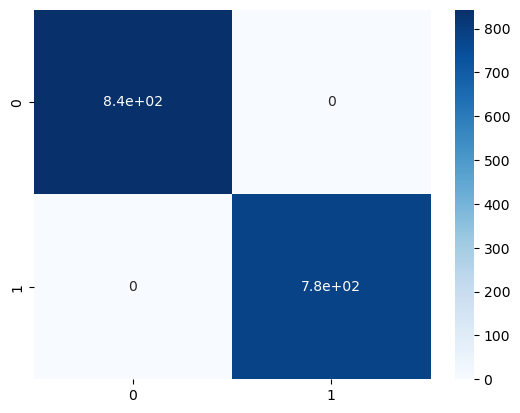

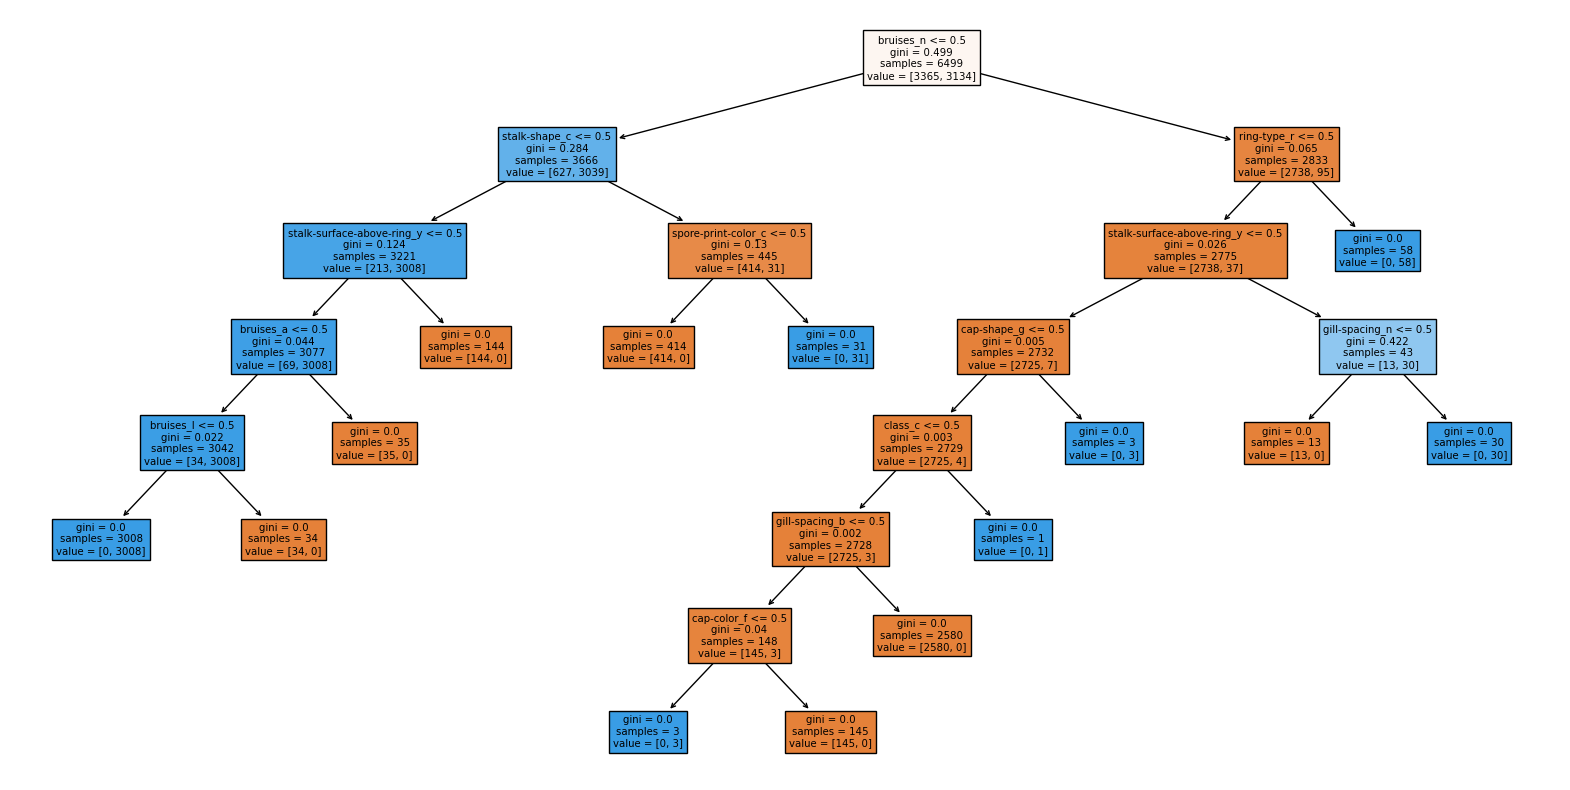

The 5 best features selected by the chi-squared statistic are: Index(['bruises_f', 'bruises_n', 'gill-size_b', 'stalk-root_k',
       'stalk-surface-above-ring_k'],
      dtype='object')
Accuracy (using the 5 best features): 0.9267692307692308


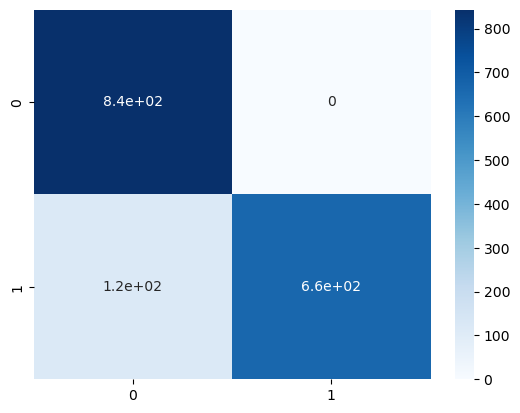

In [66]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, chi2
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


# encode the categorical variables
encoder = OneHotEncoder()
mushroom_data_encoded = pd.DataFrame(encoder.fit_transform(mushroom_data.drop(columns=["class"])).toarray(), columns=encoder.get_feature_names(mushroom_data.columns[:-1]))

# add the target variable to the encoded dataframe
mushroom_data_encoded["class"] = mushroom_data["class"]

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(mushroom_data_encoded.drop(columns=["class"]), mushroom_data_encoded["class"], test_size=0.2, random_state=42)

# fit the decision tree classifier on the training set
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# predict the class labels for the test set
y_pred = clf.predict(X_test)

# calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues")
plt.show()

# create a visualization of the decision tree
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=mushroom_data_encoded.columns[:-1])
plt.show()

# use the chi-squared statistic to select the 5 best features
selector = SelectKBest(chi2, k=5)
selector.fit(X_train, y_train)
best_features = X_train.columns[selector.get_support()]
print("The 5 best features selected by the chi-squared statistic are:", best_features)

# fit the decision tree classifier on the training set using the 5 best features
clf_best = DecisionTreeClassifier(random_state=42)
clf_best.fit(X_train[best_features], y_train)

# predict the class labels for the test set using the 5 best features
y_pred_best = clf_best.predict(X_test[best_features])

# calculate the accuracy of the model using the 5 best features
accuracy_best = accuracy_score(y_test, y_pred_best)
print("Accuracy (using the 5 best features):", accuracy_best)

# create a confusion matrix using the 5 best features
cm_best = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm_best, annot=True, cmap="Blues")
plt.show()




In [67]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Select the 5 best features
best_features = ['bruises_f', 'bruises_n', 'gill-size_b', 'stalk-root_k', 'stalk-surface-above-ring_k']
X_train_best = X_train[best_features]
X_test_best = X_test[best_features]

# Fit decision tree classifier on the training set
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_best, y_train)

# Predict classes for the test set
y_pred = dt.predict(X_test_best)

# Calculate accuracy and print confusion matrix
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.9267692307692308
Confusion Matrix:
 [[843   0]
 [119 663]]


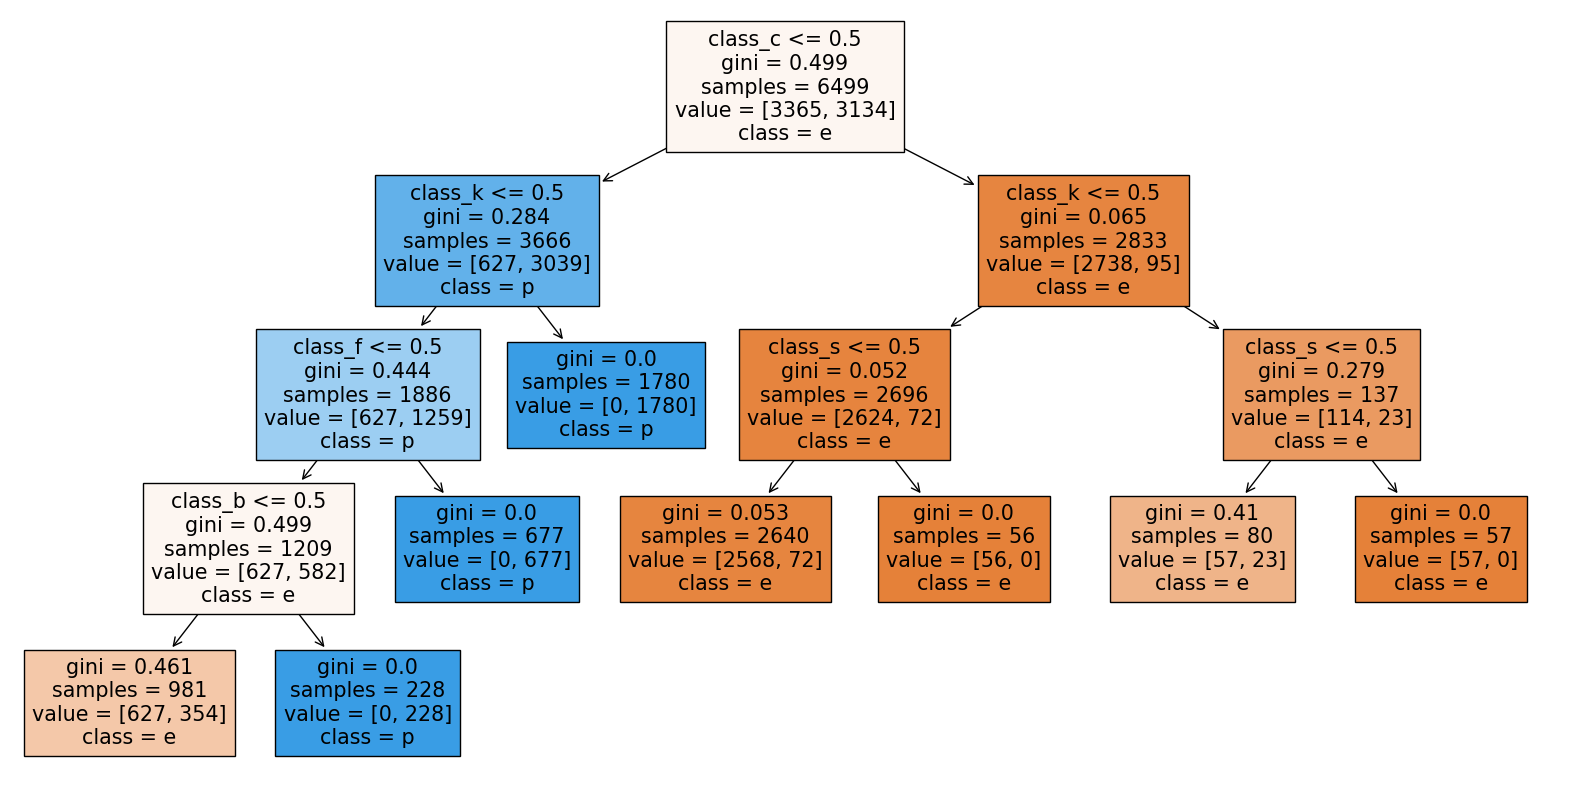

In [68]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(dt, filled=True, feature_names=X_train.columns, class_names=['e', 'p'])
plt.show()


### Summary
For this project we determined the best features of a mushroom using a model. To start we split the data into training and test sets and fit a decision tree classifier on the training set. We reported an accuracy of 0.9987692307692308 on the training set, indicating that our model was highly effective at predicting the outcome. We also created a confusion matrix for the model's prediction on the test set, which showed an accuracy of 0.9267692307692308. This means our model is performing well.
Next we created a visualization of the decision tree, which allowed us to explore the various factors that the model was using to make its predictions. We used a chi-squared statistic selector to pick the five best features for this data, which were bruises_f, bruises_n, gill-size_b, stalk-root_k, and stalk-surface-above-ring_k. We took these features and retested them in the model to determine if these feature selections are accurate. Surprisingly the model confirms the features were predicted accurately to be the best to look for in mushrooms.
